# Imports

In [1]:
#from google.colab import drive

import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import Ridge

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error

from sklearn.metrics import root_mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import f1_score

from sklearn.metrics import precision_recall_curve

from sklearn.metrics import r2_score

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

# DataSets Loading

In [2]:
#drive.mount("/content/drive")
loan = pd.read_csv("Loan.csv")
#creditCard = pd.read_csv("/content/drive/My Drive/CSAI 253 Data Sets/creditcard.csv")

# Preprocessing

In [3]:
loan.describe()
copy = loan.copy()
copy.describe()
copy.drop_duplicates()
copy.dropna()
c = 0
#Not Needed
copy = copy.drop(columns='ApplicationDate')
#Handling Categorical Columns
le = LabelEncoder()
listOfColumns = []

listOfCategoricalColumns = []
for i in copy.select_dtypes(include = 'number'):
    listOfColumns.append(i)
for j in copy.columns:
    if j not in listOfColumns:
        listOfCategoricalColumns.append(j)
for i in listOfCategoricalColumns:
    copy[i] = le.fit_transform(copy[i])
    print(f"{i} after {copy[i]}")

EmploymentStatus after 0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: EmploymentStatus, Length: 20000, dtype: int64
EducationLevel after 0        4
1        0
2        1
3        3
4        0
        ..
19995    3
19996    0
19997    1
19998    3
19999    0
Name: EducationLevel, Length: 20000, dtype: int64
MaritalStatus after 0        1
1        2
2        1
3        2
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: MaritalStatus, Length: 20000, dtype: int64
HomeOwnershipStatus after 0        2
1        0
2        3
3        0
4        0
        ..
19995    3
19996    3
19997    0
19998    2
19999    2
Name: HomeOwnershipStatus, Length: 20000, dtype: int64
LoanPurpose after 0        3
1        1
2        2
3        3
4        1
        ..
19995    0
19996    1
19997    3
19998    1
19999    4
Name: LoanPurpose, Length: 20000, dtype: int64


Visualization

In [4]:
#historams, boxplots, scatterplots

In [5]:
X = copy[copy.columns]

Y = X['RiskScore']
scale = StandardScaler()
scaledX = scale.fit_transform(X)

#B Training

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    scaledX, Y, test_size=0.20, random_state=0)

Storing All Results

In [7]:
models_Errors = {}

#Linear Regression

Fitting

In [29]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

Prediction

In [30]:
yhat = linear_reg.predict(X_test)

Evaluation

In [31]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['Linear Regression'] = Errors
print(f"MSE for Linear Regression: {MSE} ")
print(f"RMSE for Linear Regression: {RMSE}")
print(f"MAE for Linear Regression: {MAE}")
print(f"R2_Score for Linear Regression: {r2Score}")
print(models_Errors)

MSE for Linear Regression: 8.864587764149554e-29 
RMSE for Linear Regression: 9.41519397790059e-15
MAE for Linear Regression: 6.861178292183467e-15
R2_Score for Linear Regression: 1.0
{'Linear Regression': {'MSE': np.float64(8.864587764149554e-29), 'RMSE': np.float64(9.41519397790059e-15), 'MAE': np.float64(6.861178292183467e-15), 'r2_Score': 1.0}, 'KNN': {'MSE': np.float64(7.978682499999999), 'RMSE': np.float64(2.8246561737669946), 'MAE': np.float64(2.2064250000000003), 'r2_Score': 0.869823560549732}, 'Ridge': {'MSE': np.float64(3.3947629242008894e-06), 'RMSE': np.float64(0.0018424882426221582), 'MAE': np.float64(0.001452902239036252), 'r2_Score': 0.9999999446126412}}


#KNN

Fitting

In [11]:
KNN_Reg = KNeighborsRegressor(2)
KNN_Reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

Predection

In [12]:
yhat = KNN_Reg.predict(X_test)

Evaluation

In [13]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['KNN'] = Errors
print(f"MSE for KNN: {MSE} ")
print(f"RMSE for KNN: {RMSE}")
print(f"MAE for KNN: {MAE}")
print(f"R2_Score for KNN: {r2Score}")
print(models_Errors)

MSE for KNN: 7.978682499999999 
RMSE for KNN: 2.8246561737669946
MAE for KNN: 2.2064250000000003
R2_Score for KNN: 0.869823560549732
{'Linear Regression': {'MSE': np.float64(8.864587764149554e-29), 'RMSE': np.float64(9.41519397790059e-15), 'MAE': np.float64(6.861178292183467e-15), 'r2_Score': 1.0}, 'KNN': {'MSE': np.float64(7.978682499999999), 'RMSE': np.float64(2.8246561737669946), 'MAE': np.float64(2.2064250000000003), 'r2_Score': 0.869823560549732}}


Ridge

Fitting

In [14]:
RG = Ridge()
RG.fit(X_train,y_train)


Ridge()

Prediction

In [15]:
yhat = RG.predict(X_test)

Evaluation

In [16]:
MSE = mean_squared_error(y_test,yhat)
RMSE = root_mean_squared_error(y_test,yhat)
MAE = mean_absolute_error(y_test,yhat)
r2Score = r2_score(y_test,yhat)
Errors = {}
Errors['MSE'] = MSE
Errors['RMSE'] = RMSE
Errors['MAE'] = MAE
Errors['r2_Score'] = r2Score
models_Errors['Ridge'] = Errors
print(f"MSE for Ridge Regression: {MSE} ")
print(f"RMSE for Ridge Regression: {RMSE}")
print(f"MAE for Ridge Regression: {MAE}")
print(f"R2_Score for Ridge Regression: {r2Score}")
print(models_Errors)

MSE for Ridge Regression: 3.3947629242008894e-06 
RMSE for Ridge Regression: 0.0018424882426221582
MAE for Ridge Regression: 0.001452902239036252
R2_Score for Ridge Regression: 0.9999999446126412
{'Linear Regression': {'MSE': np.float64(8.864587764149554e-29), 'RMSE': np.float64(9.41519397790059e-15), 'MAE': np.float64(6.861178292183467e-15), 'r2_Score': 1.0}, 'KNN': {'MSE': np.float64(7.978682499999999), 'RMSE': np.float64(2.8246561737669946), 'MAE': np.float64(2.2064250000000003), 'r2_Score': 0.869823560549732}, 'Ridge': {'MSE': np.float64(3.3947629242008894e-06), 'RMSE': np.float64(0.0018424882426221582), 'MAE': np.float64(0.001452902239036252), 'r2_Score': 0.9999999446126412}}


Scores for all Models

In [17]:
for model,metrics in models_Errors.items():
    print(model)
    for metric,value in metrics.items():
        print(f"{metric}: {value}")

Linear Regression
MSE: 8.864587764149554e-29
RMSE: 9.41519397790059e-15
MAE: 6.861178292183467e-15
r2_Score: 1.0
KNN
MSE: 7.978682499999999
RMSE: 2.8246561737669946
MAE: 2.2064250000000003
r2_Score: 0.869823560549732
Ridge
MSE: 3.3947629242008894e-06
RMSE: 0.0018424882426221582
MAE: 0.001452902239036252
r2_Score: 0.9999999446126412


The Winner Model Scores

In [18]:
winnerModel = ""
scores = float("inf") 
for model, metrics in models_Errors.items():
    if metrics["MSE"] < scores: 
        winnerModel = model
        scores = metrics["MSE"]
    if metrics["RMSE"] < scores:  
        winnerModel = model
        scores = metrics["RMSE"]
    if metrics["MAE"] < scores:  
        winnerModel = model
        scores = metrics["MAE"]
    if metrics["r2_Score"] < scores: 
        winnerModel = model
        scores = metrics["r2_Score"]
print(f"The best model is: {winnerModel}")
print(f"Metrics for {winnerModel}:")
    
for metrics,value in models_Errors[winnerModel].items():
    print(f"{metrics}: {value}")
    

The best model is: Linear Regression
Metrics for Linear Regression:
MSE: 8.864587764149554e-29
RMSE: 9.41519397790059e-15
MAE: 6.861178292183467e-15
r2_Score: 1.0


# Visualization

C:\Users\zyada\AppData\Local\Temp\ipykernel_22972\1156746243.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


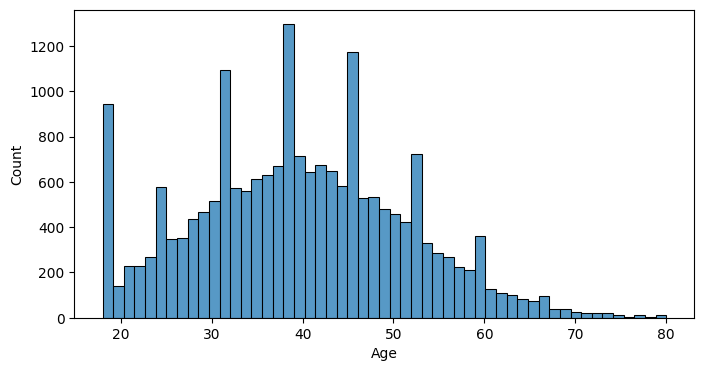

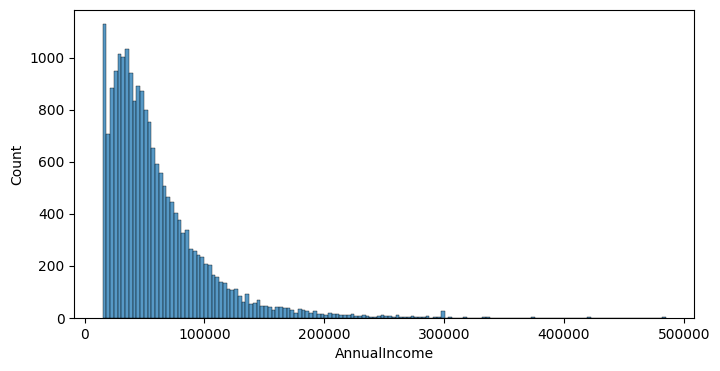

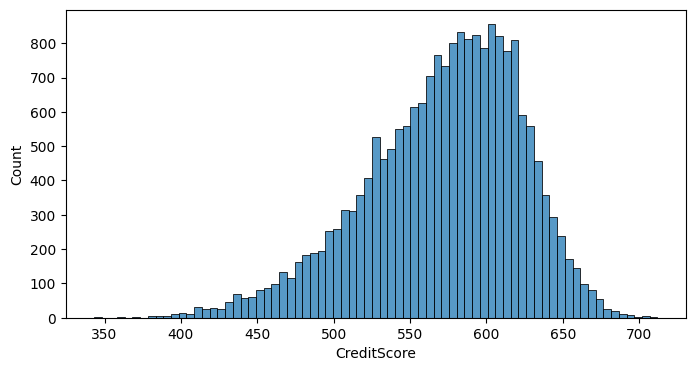

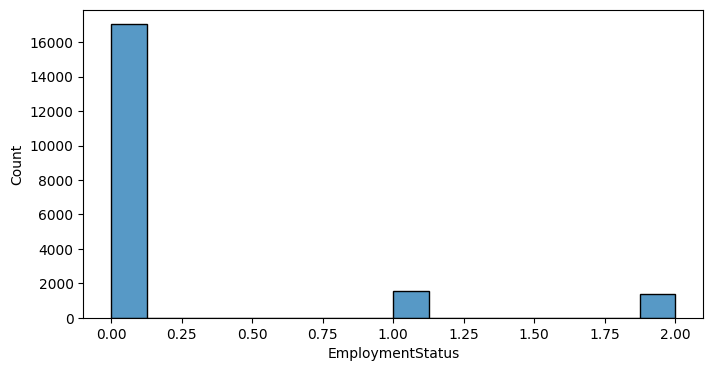

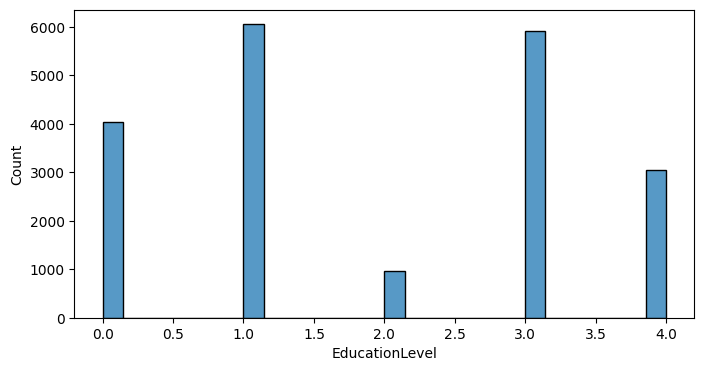

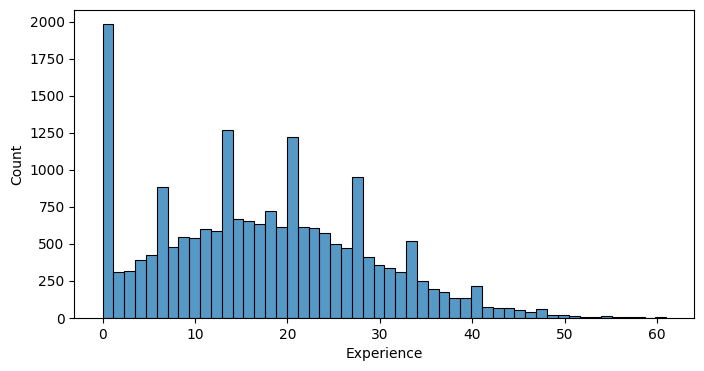

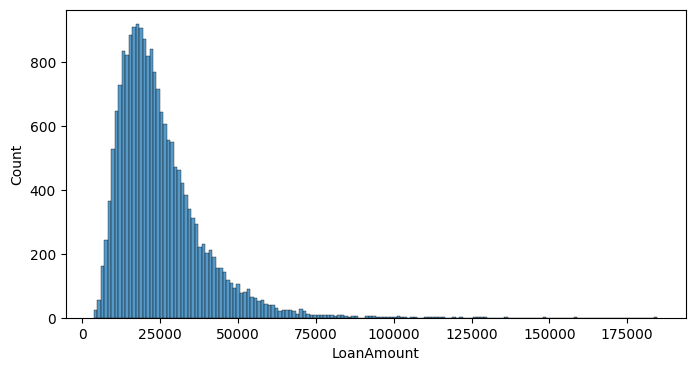

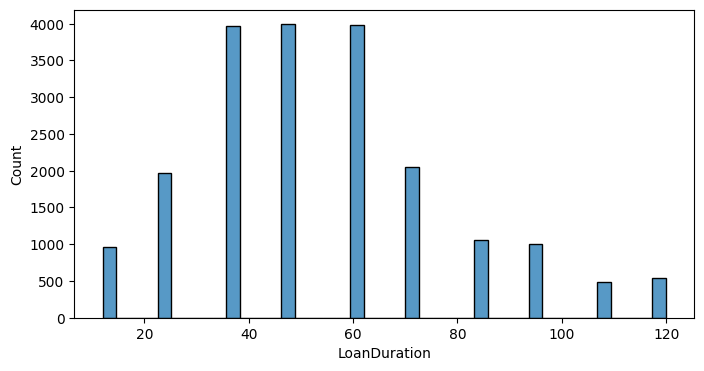

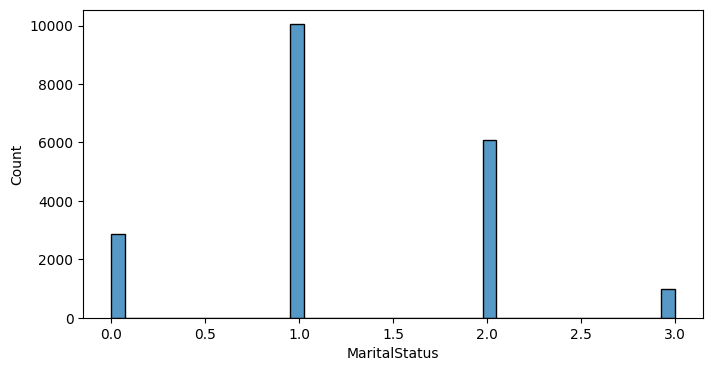

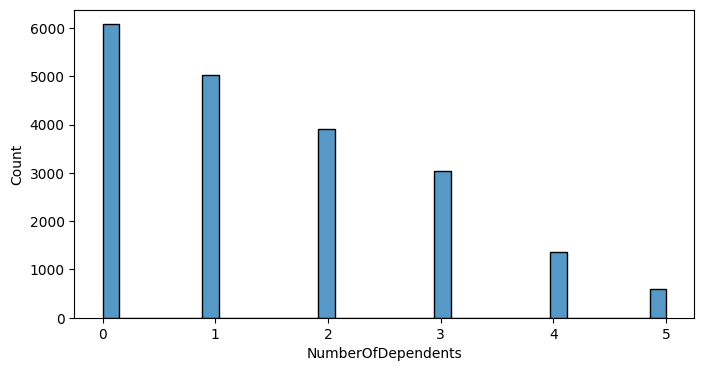

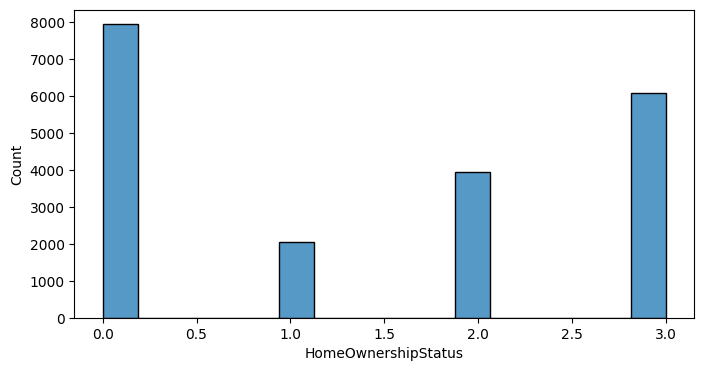

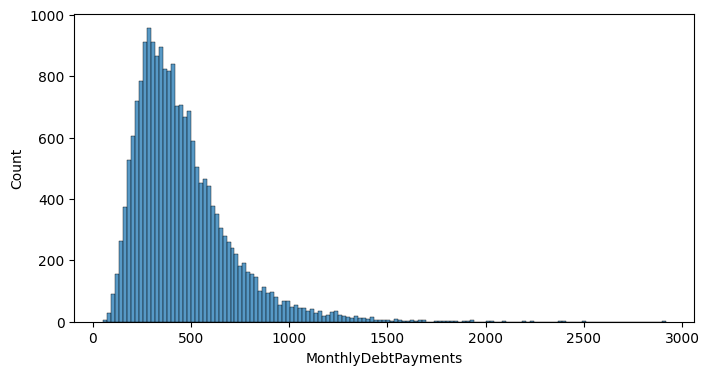

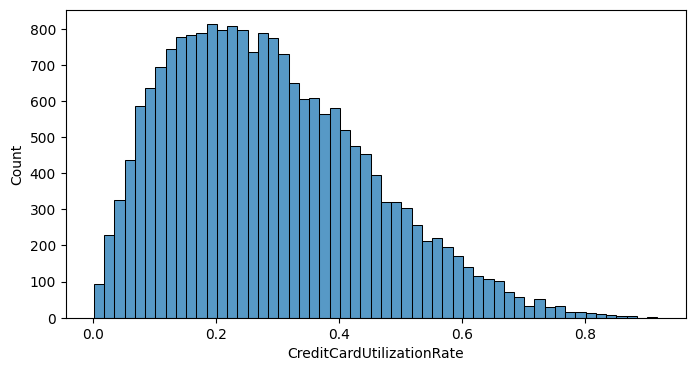

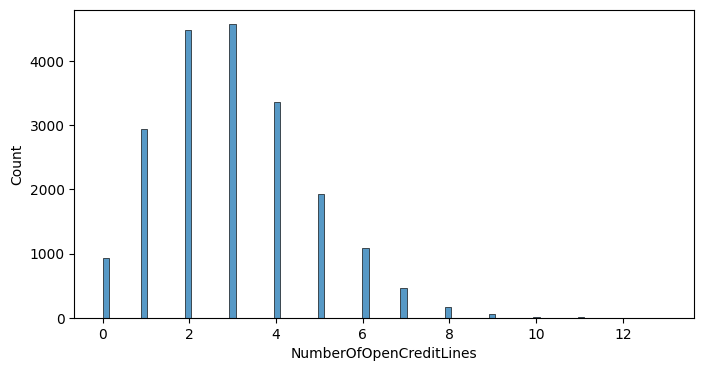

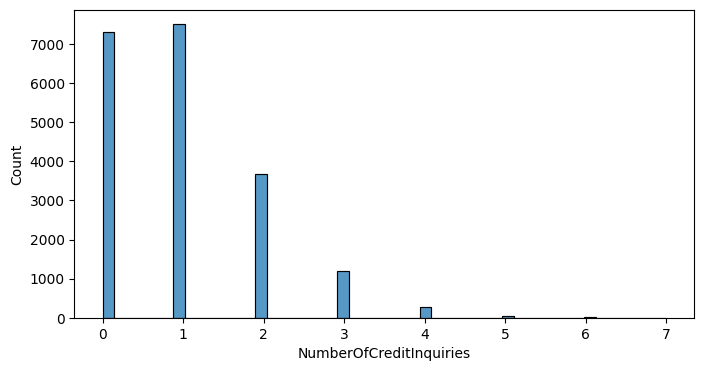

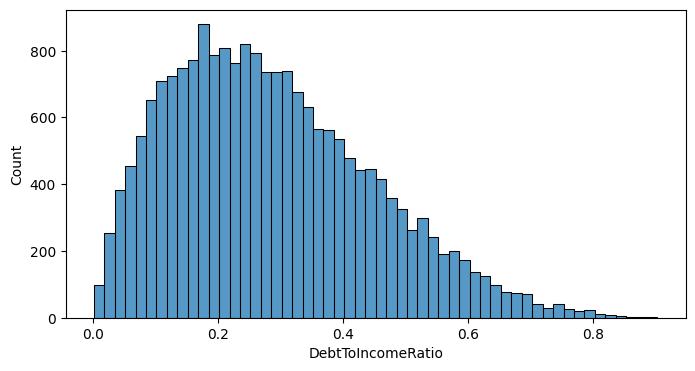

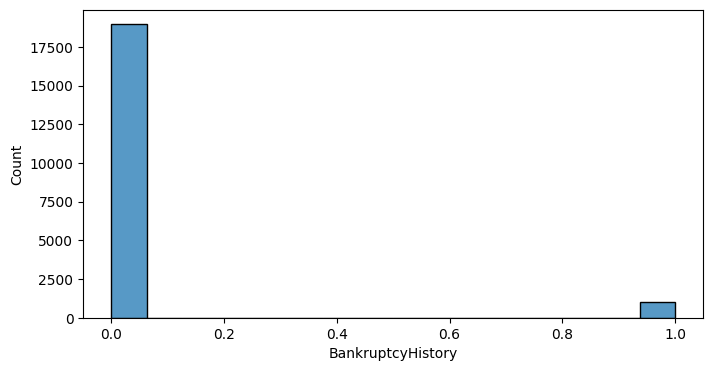

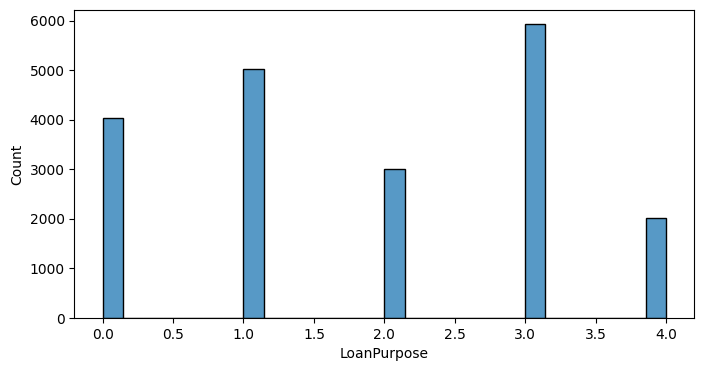

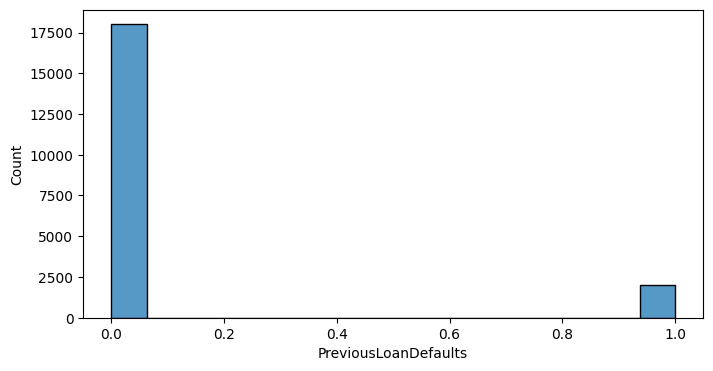

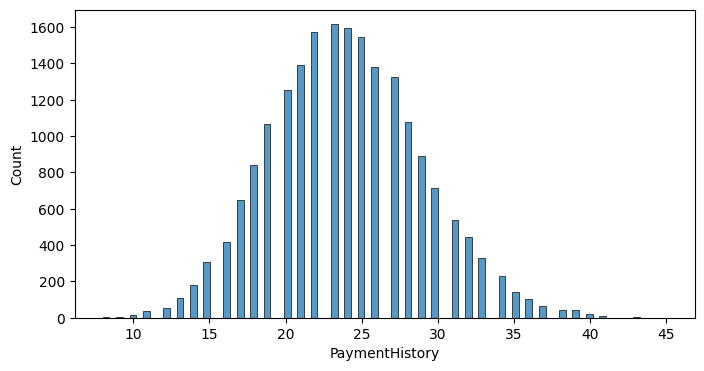

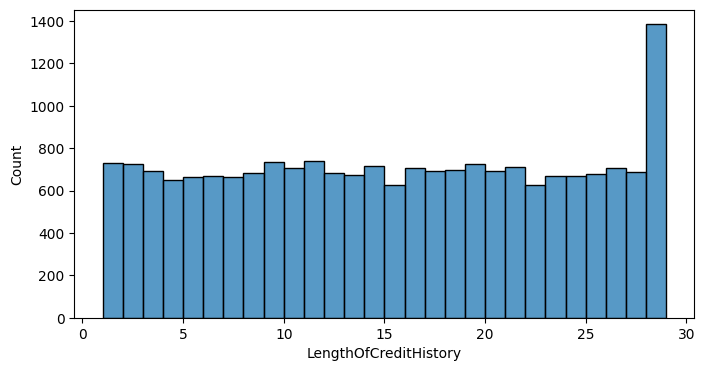

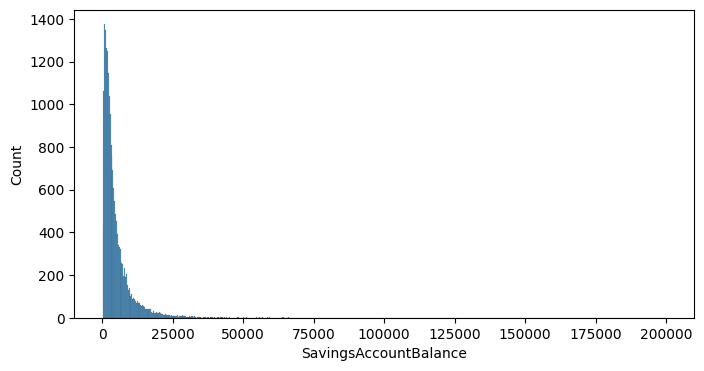

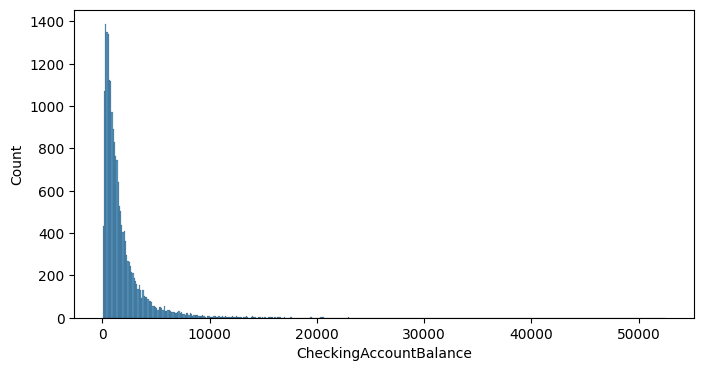

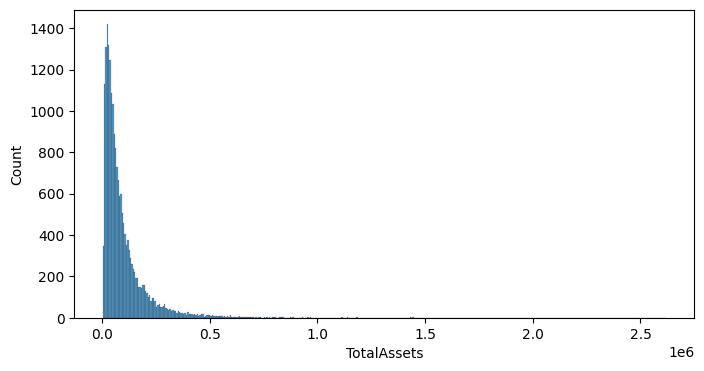

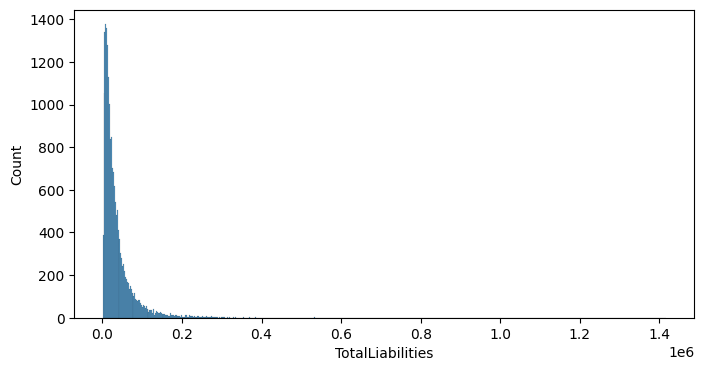

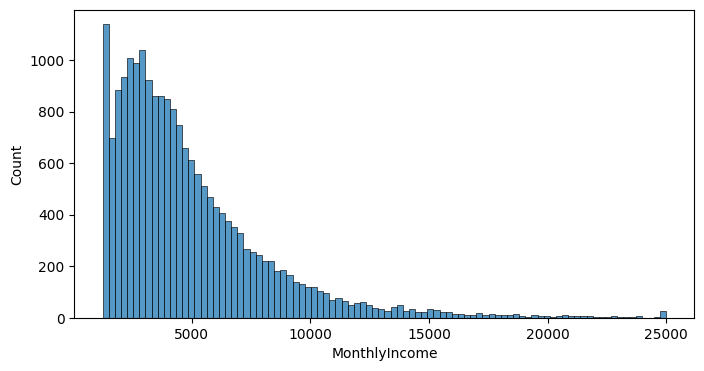

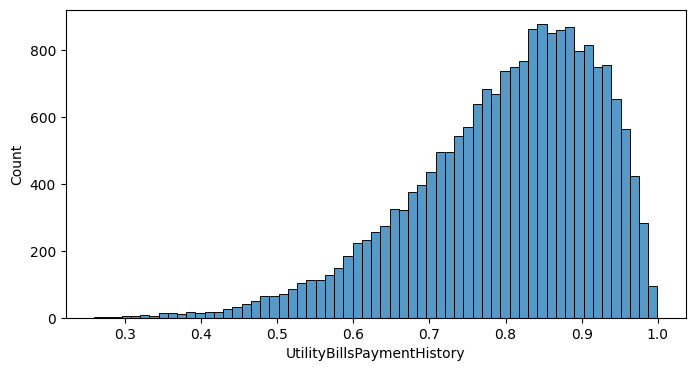

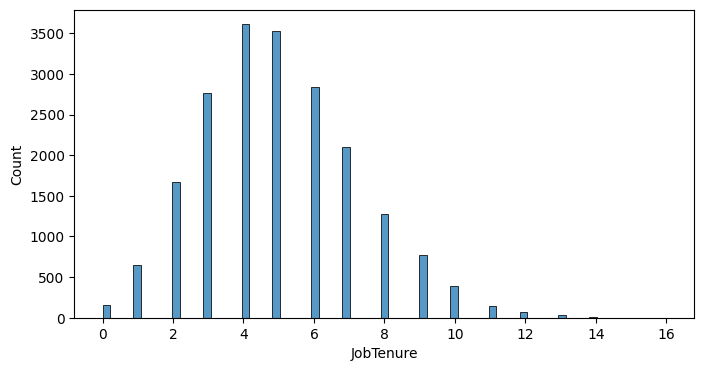

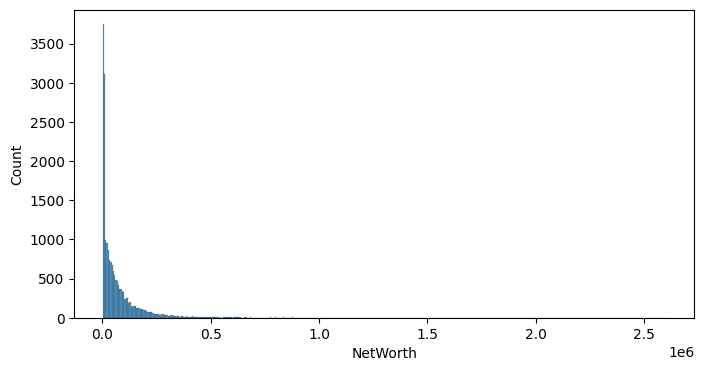

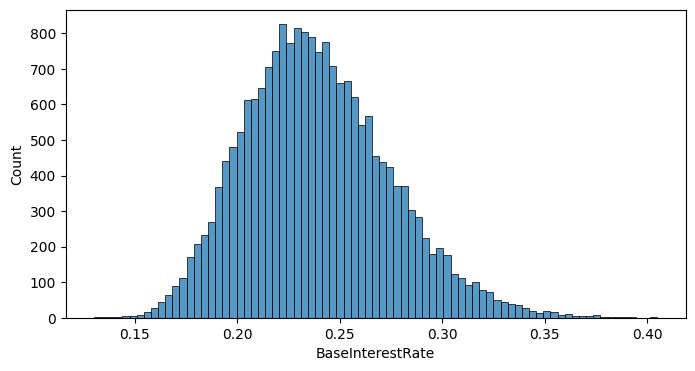

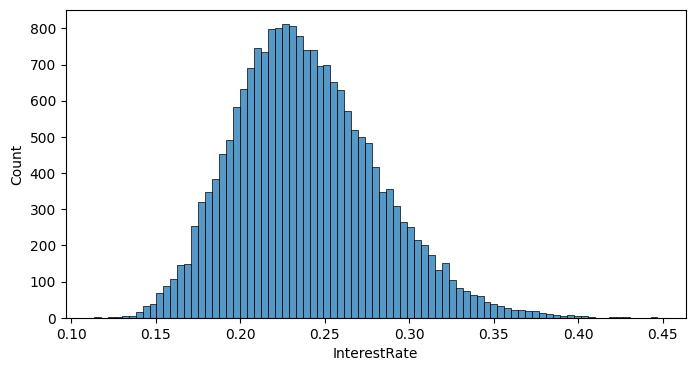

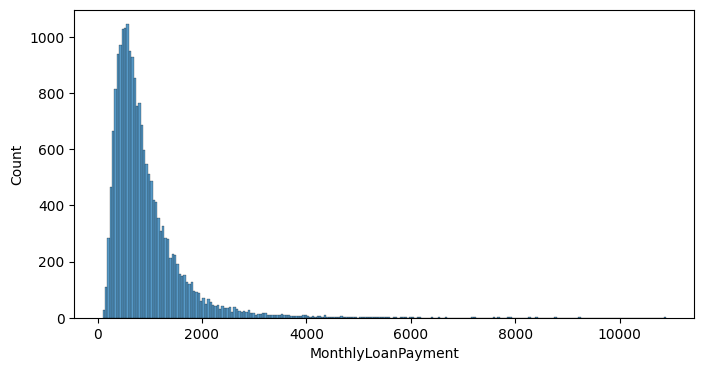

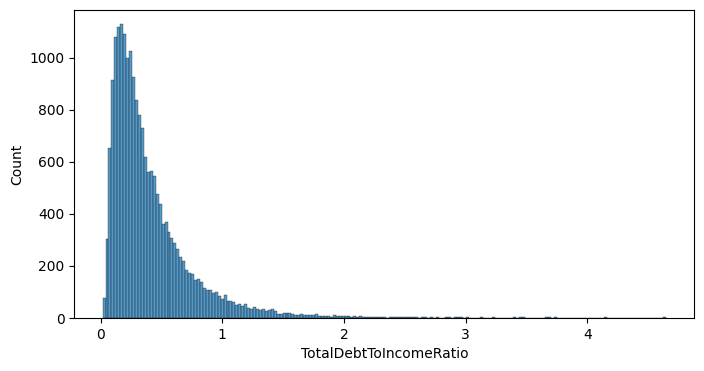

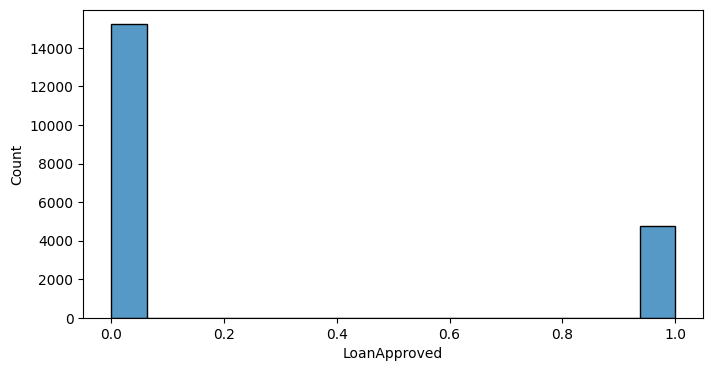

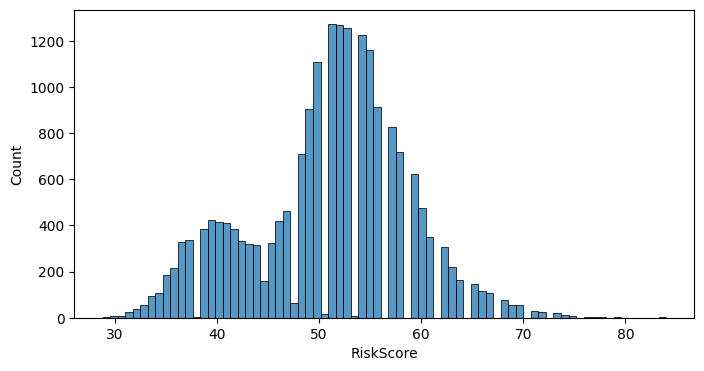

In [19]:
for i in X:
    plt.figure(figsize=(8, 4))
    sns.histplot(X[i])
plt.show()

C:\Users\zyada\AppData\Local\Temp\ipykernel_22972\3780644109.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


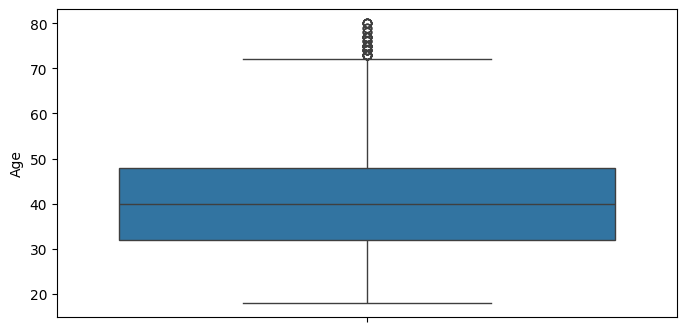

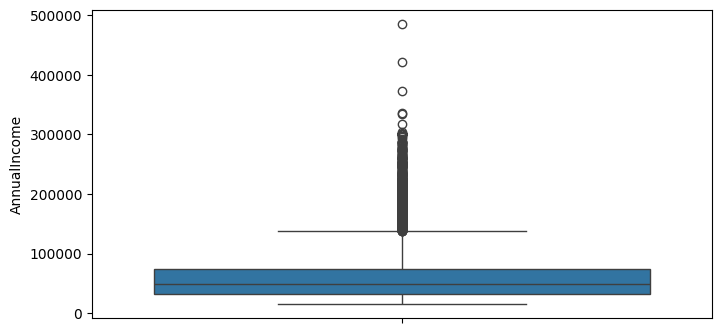

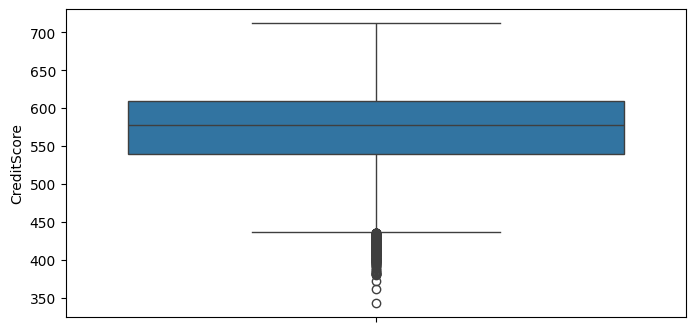

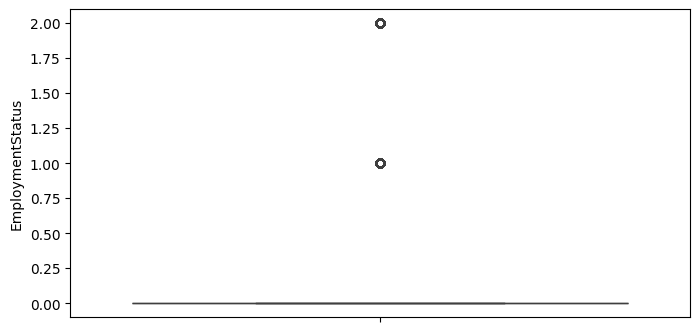

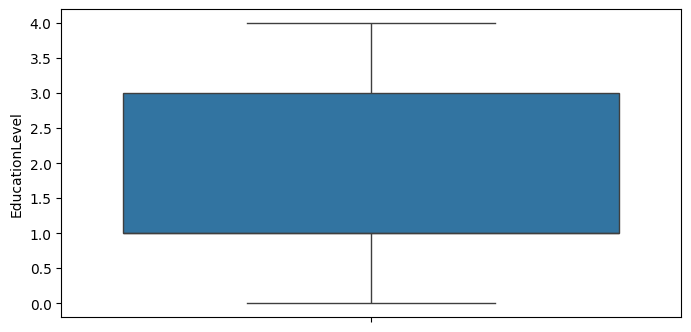

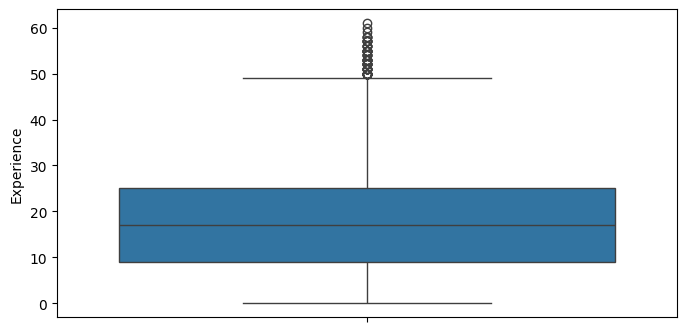

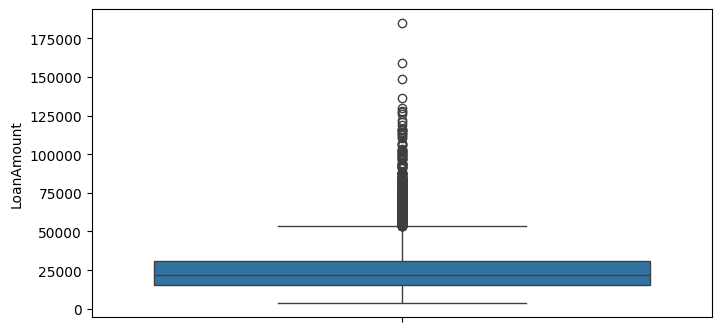

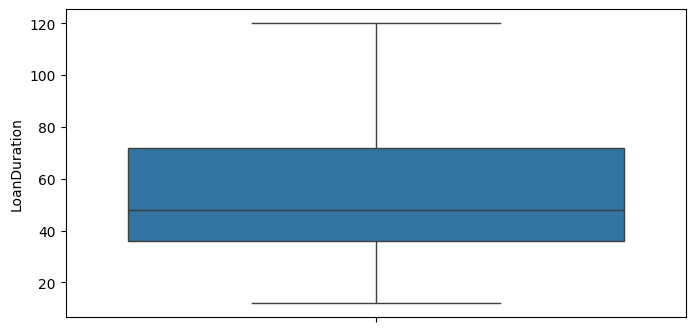

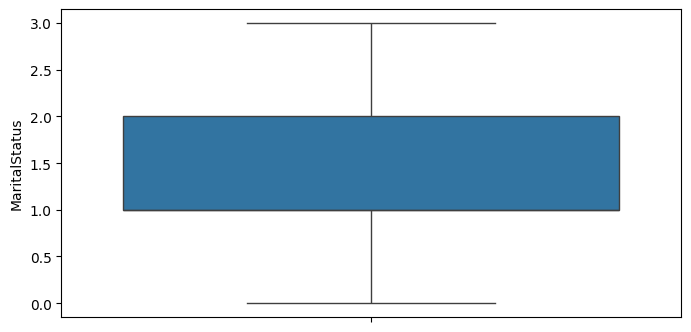

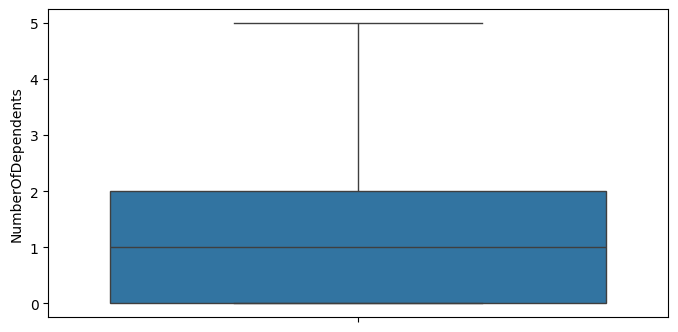

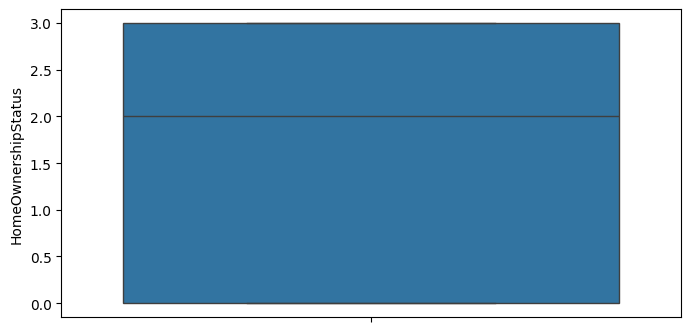

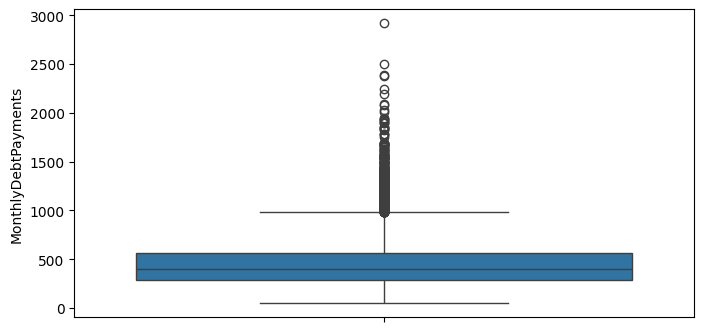

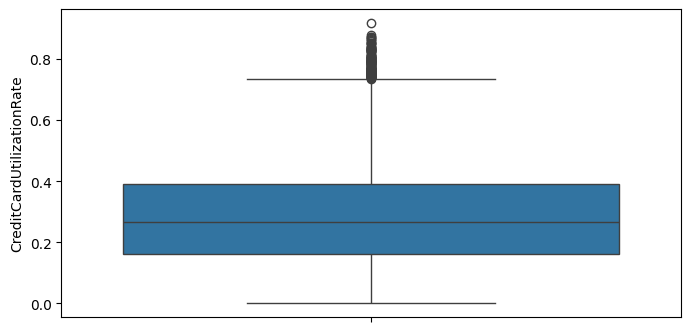

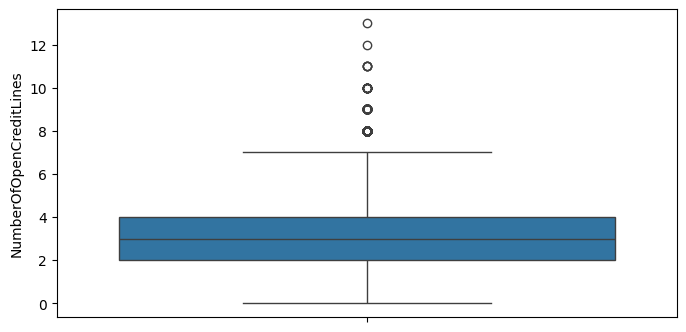

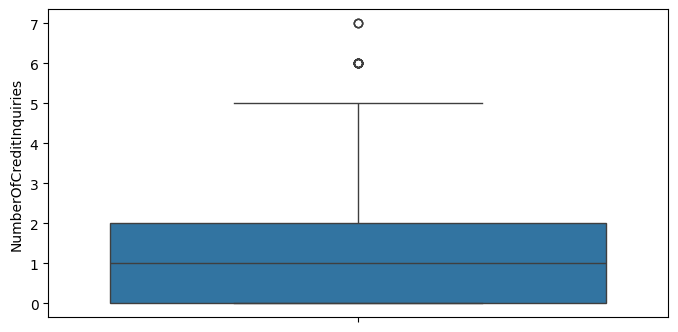

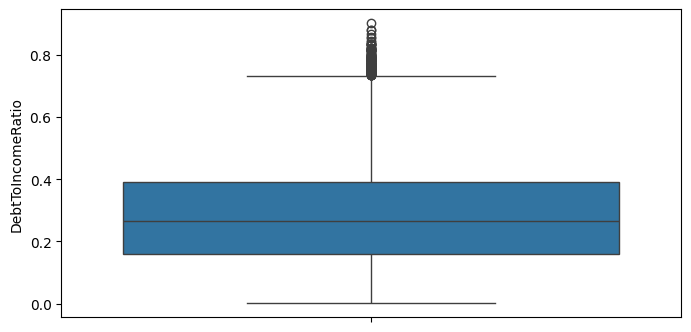

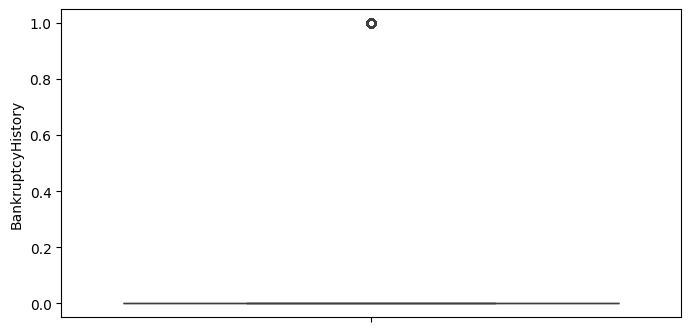

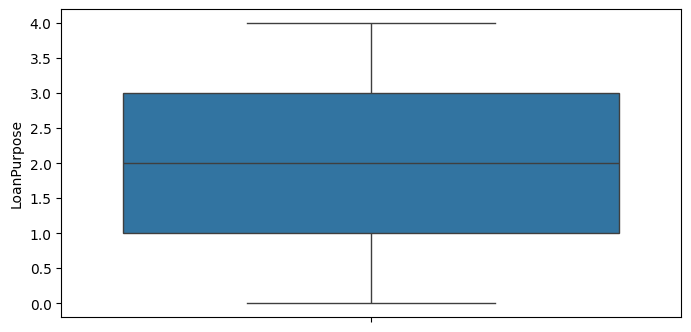

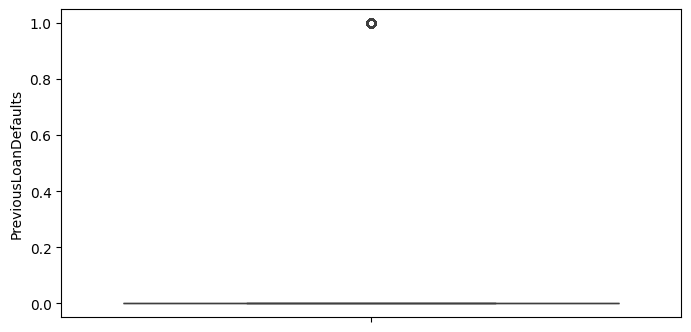

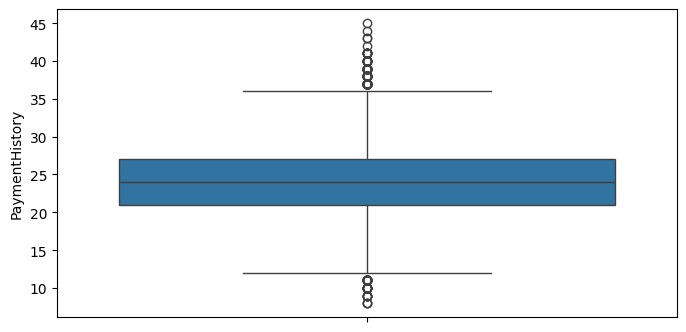

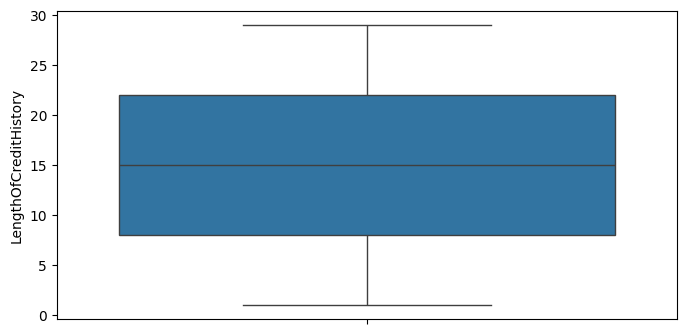

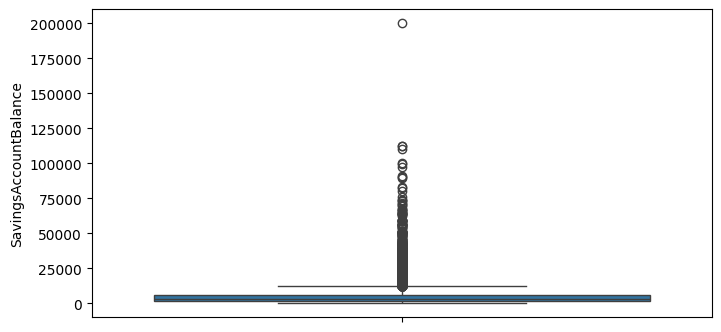

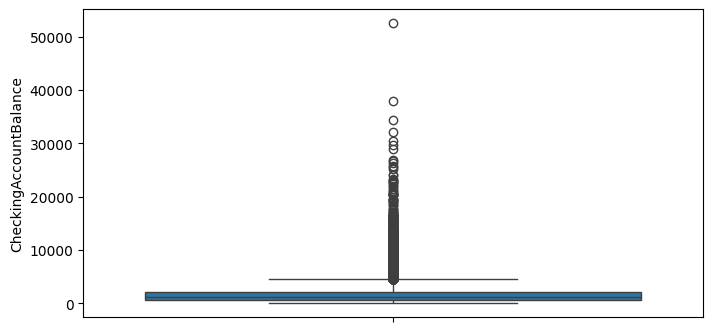

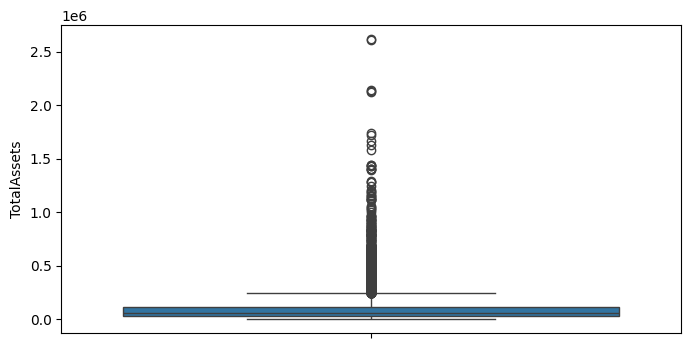

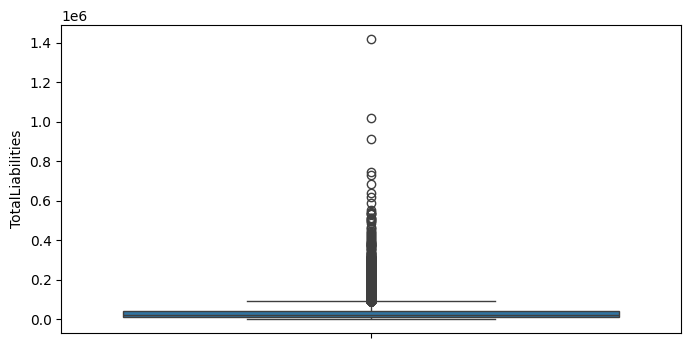

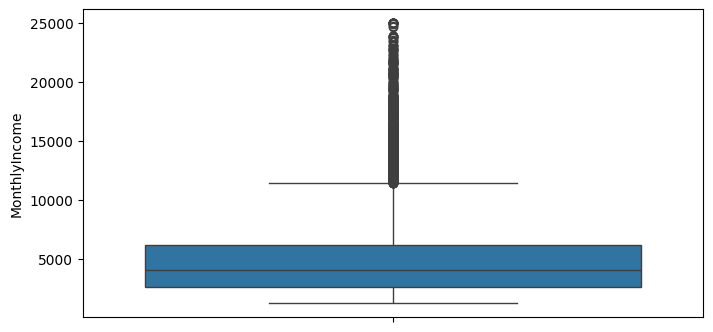

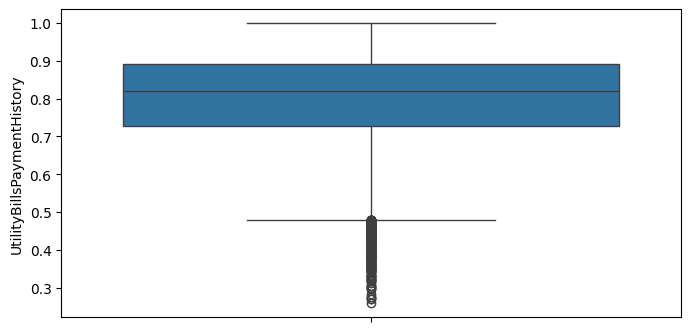

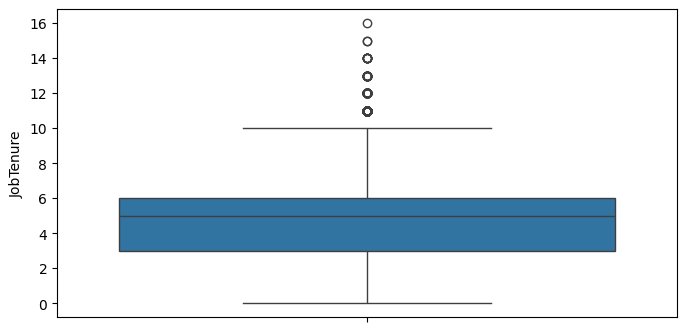

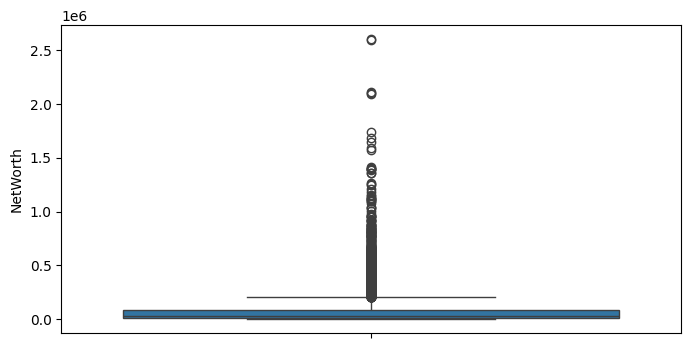

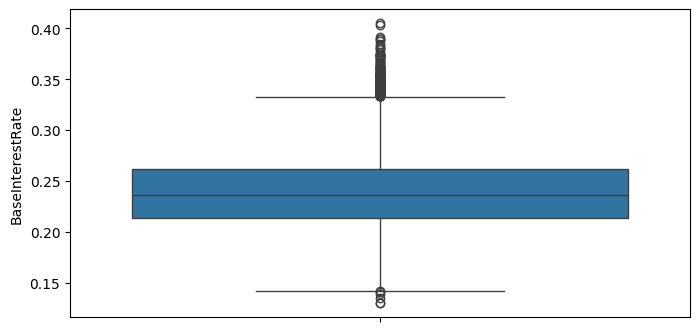

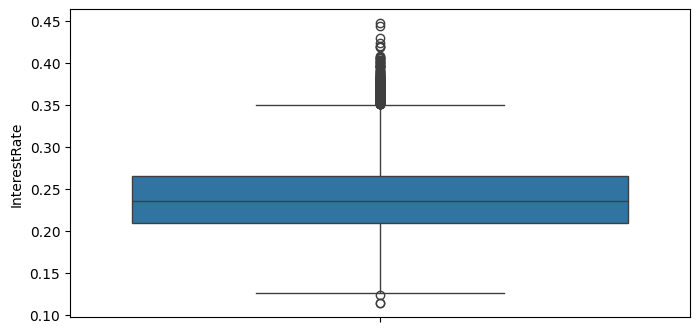

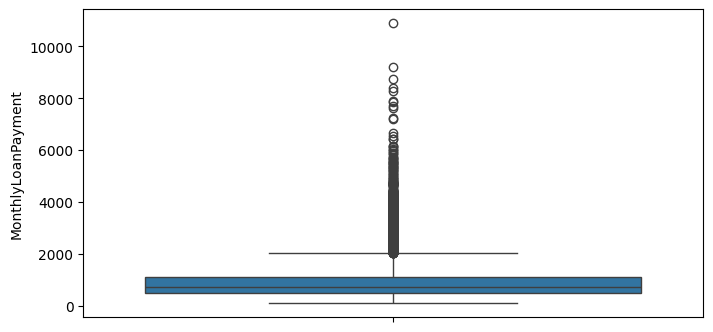

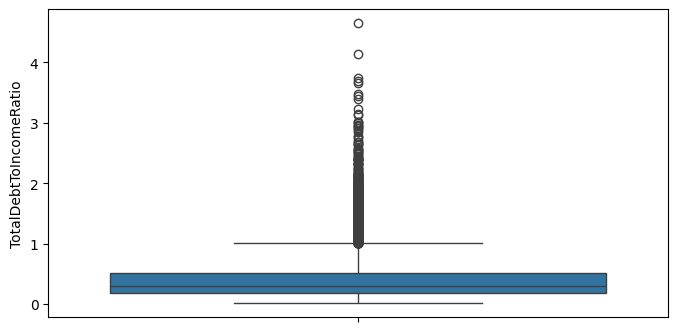

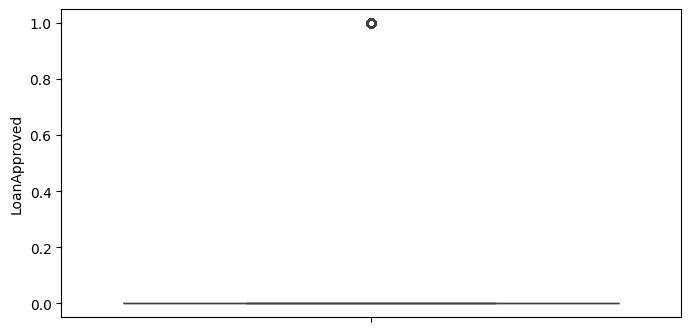

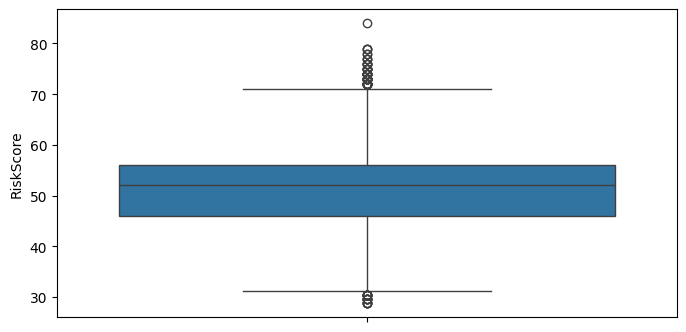

In [20]:
for i in X:
    plt.figure(figsize=(8, 4))
    sns.boxplot(X[i])
plt.show()

C:\Users\zyada\AppData\Local\Temp\ipykernel_22972\1334677948.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


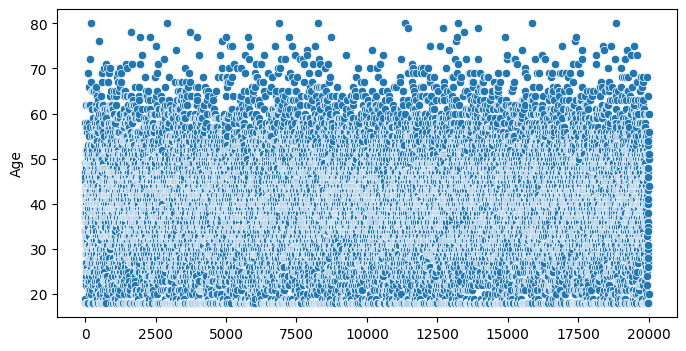

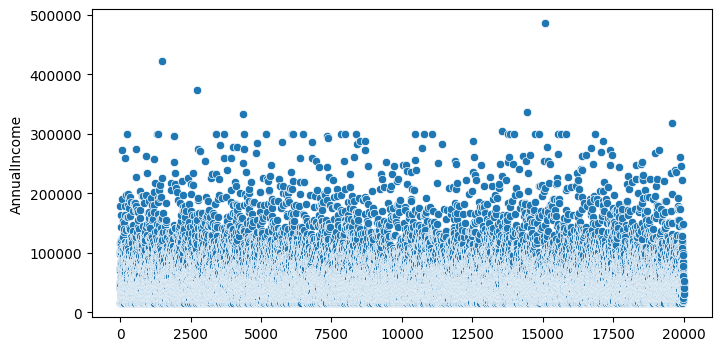

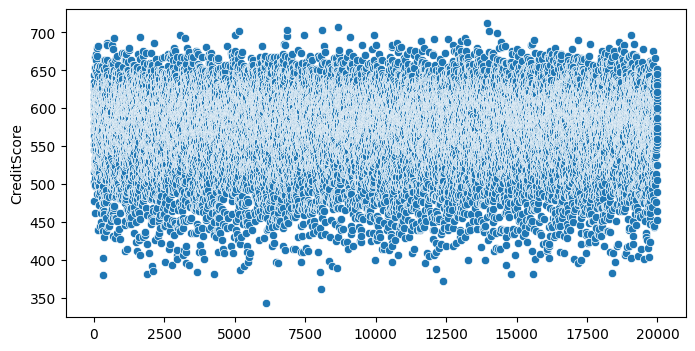

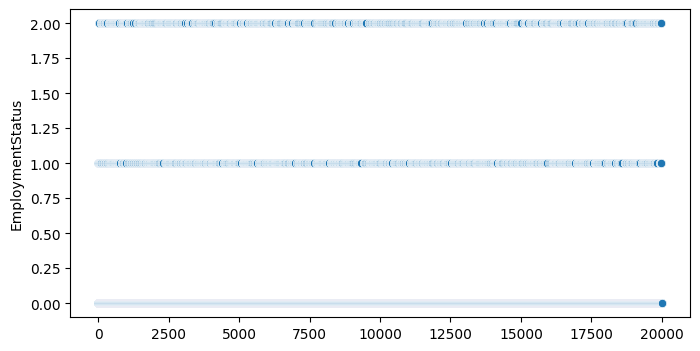

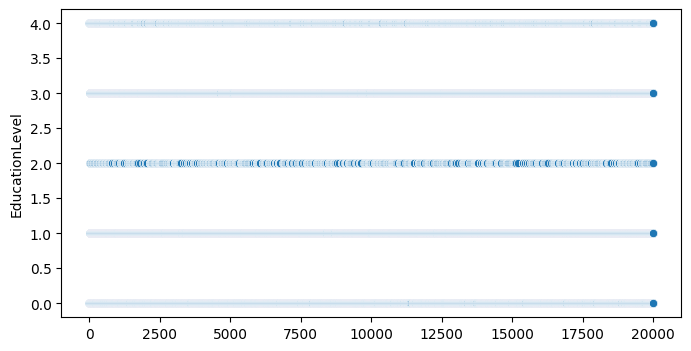

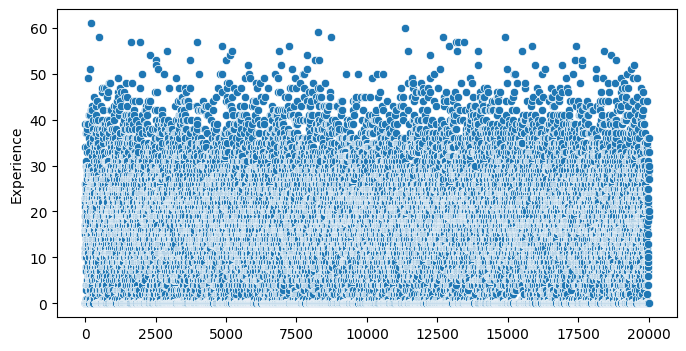

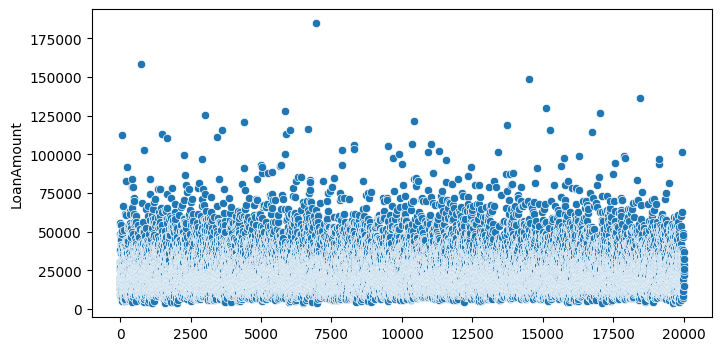

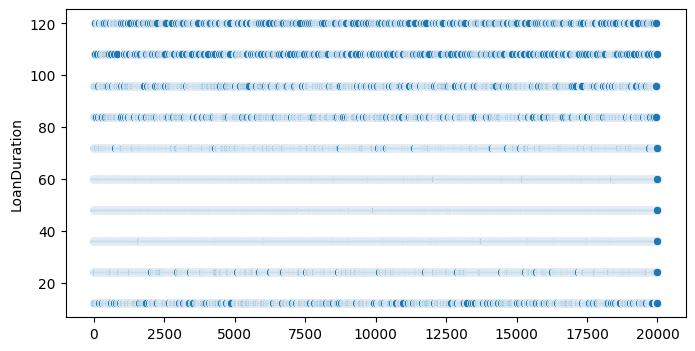

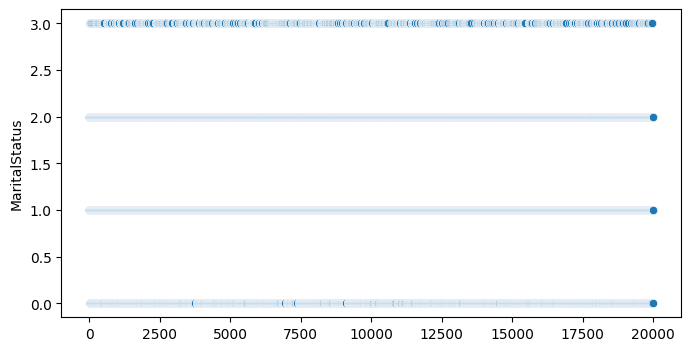

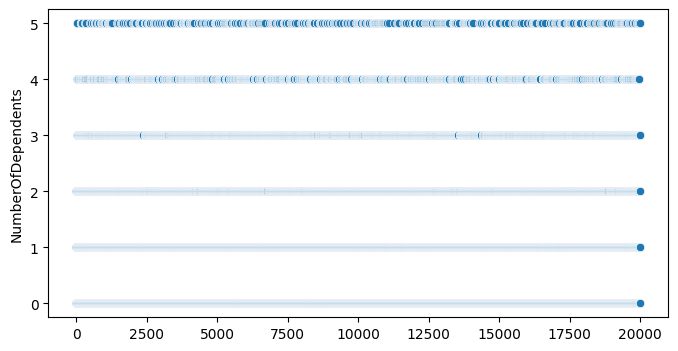

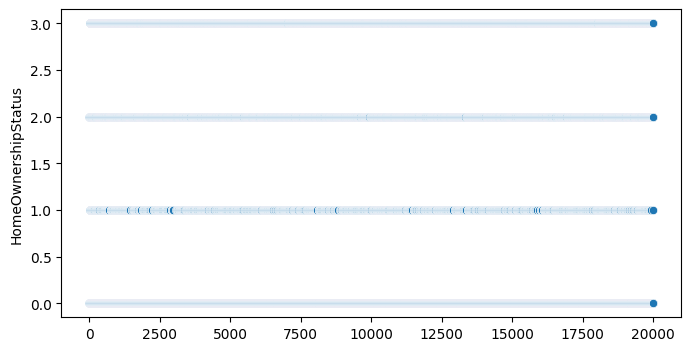

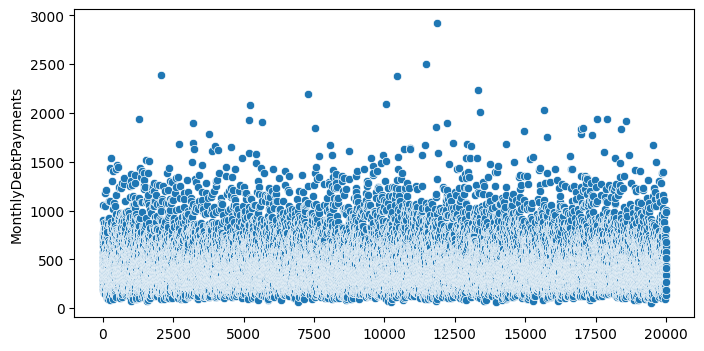

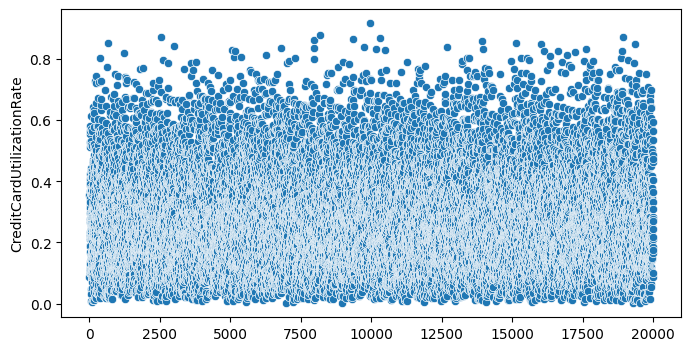

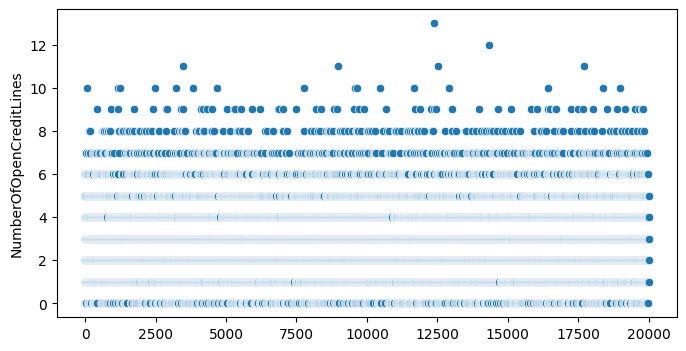

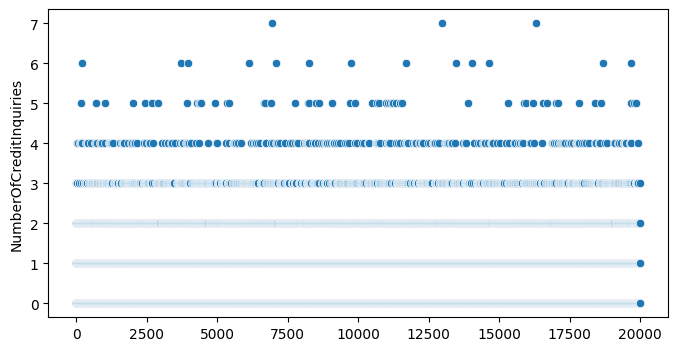

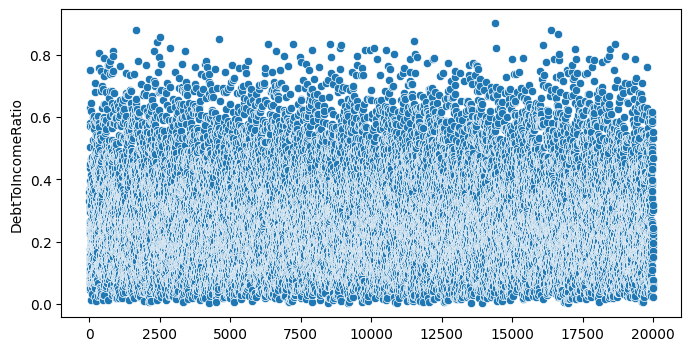

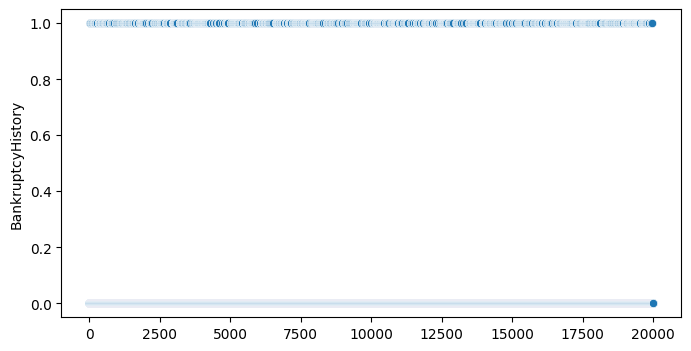

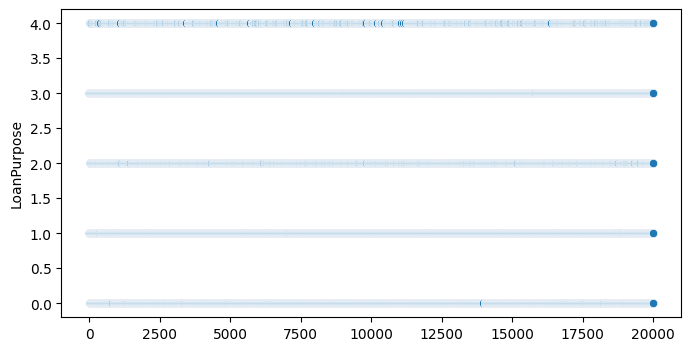

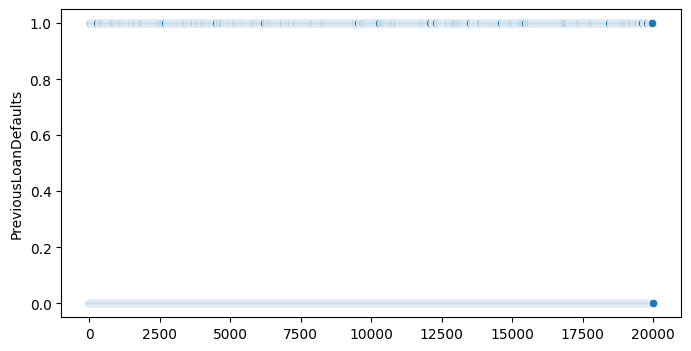

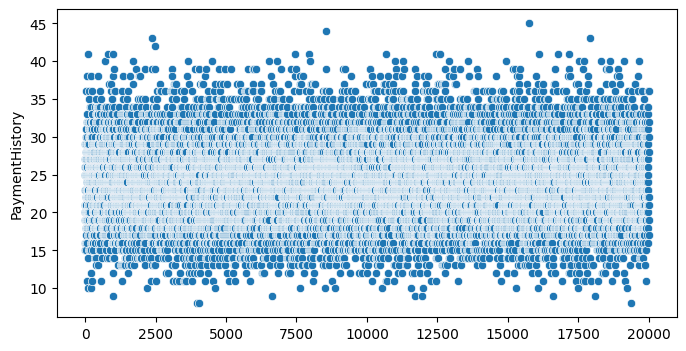

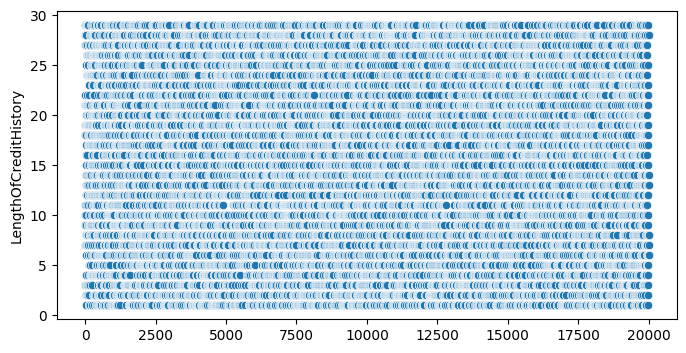

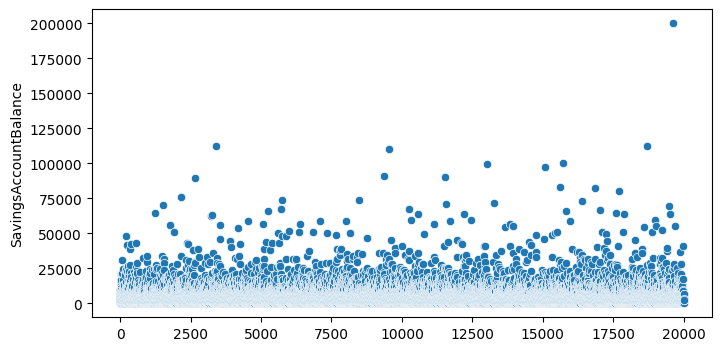

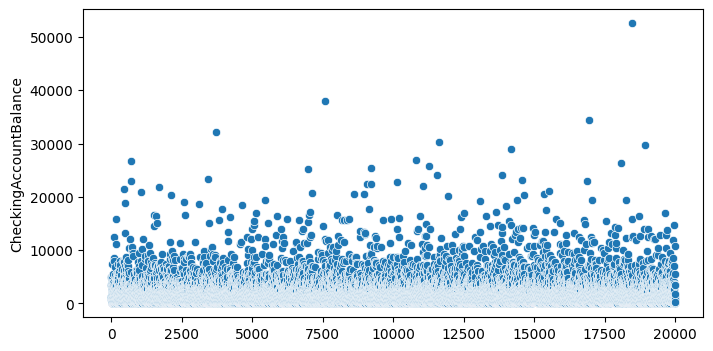

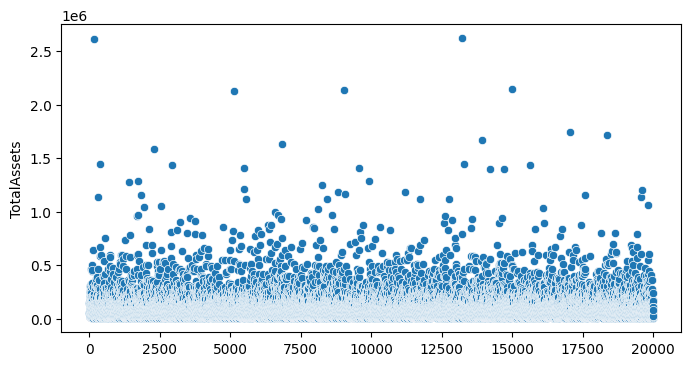

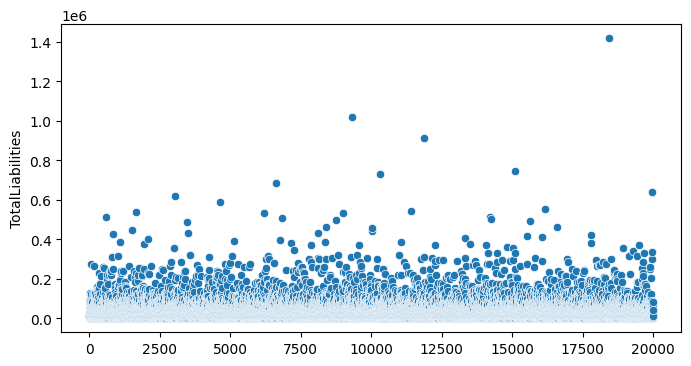

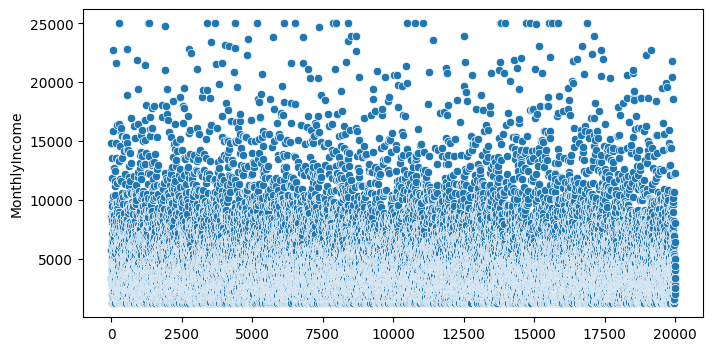

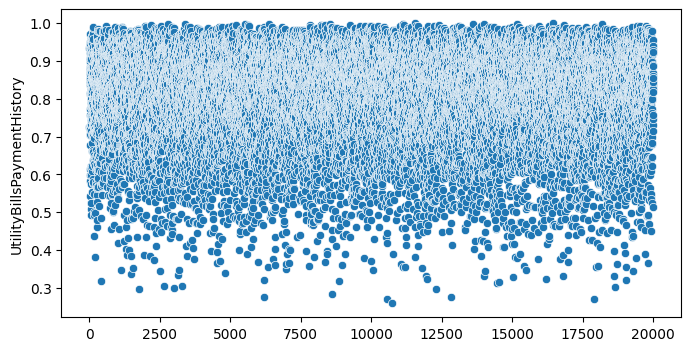

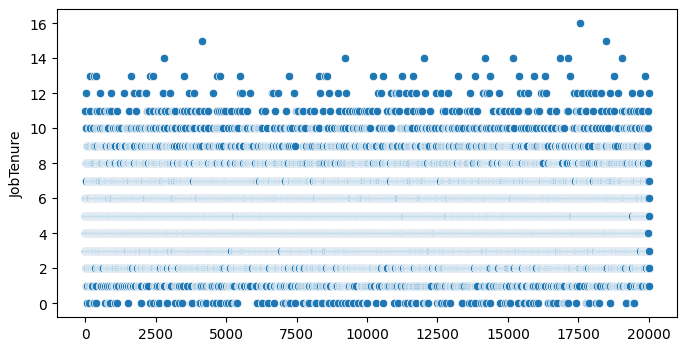

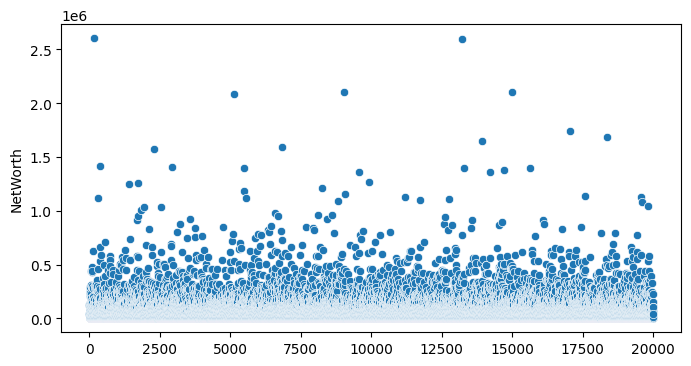

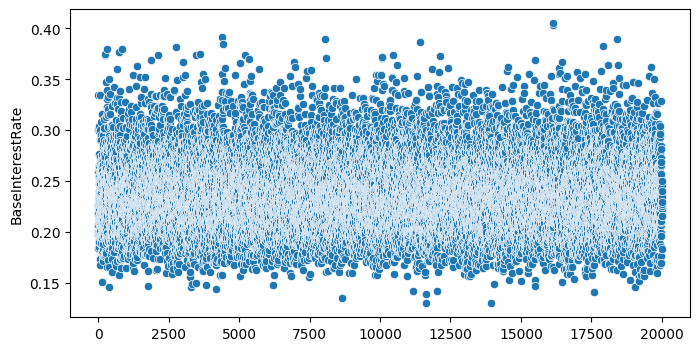

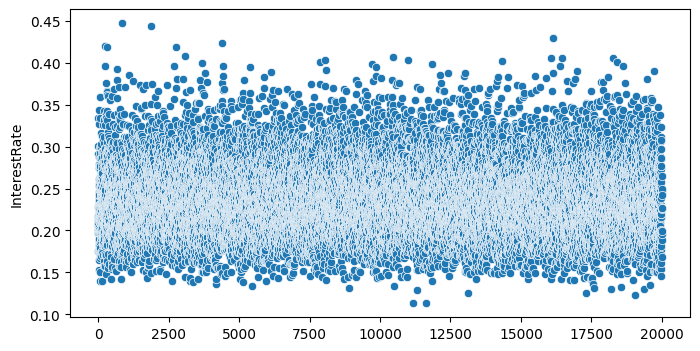

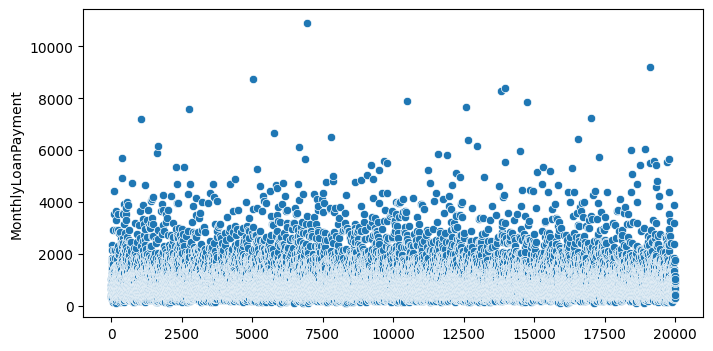

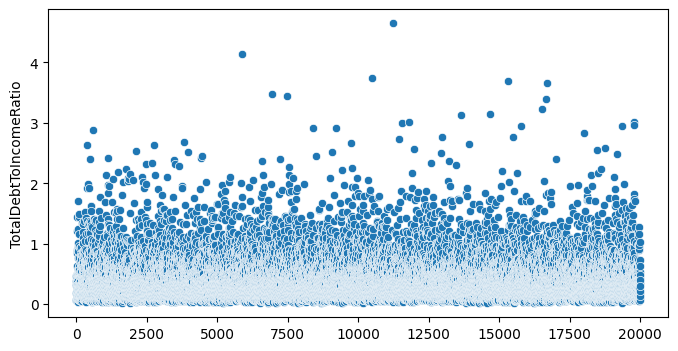

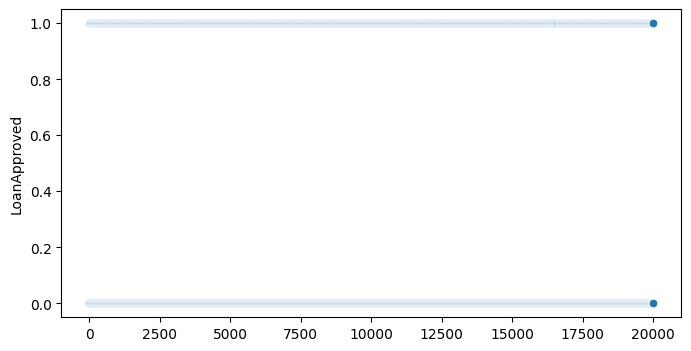

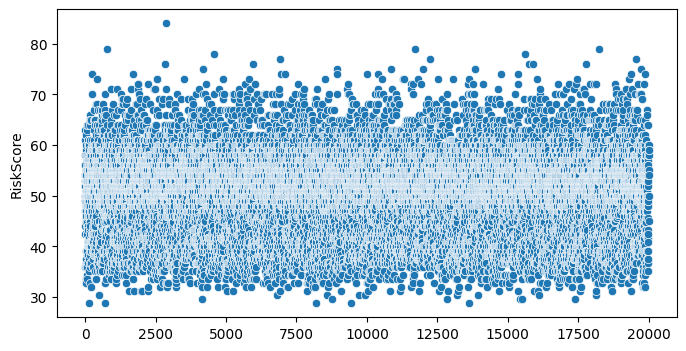

In [21]:
for i in X:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(X[i])
plt.show()

Correlations

In [22]:
corrMatrix = copy.corr()
strongPositveCorr = []
strongPositveCorrWithOneColumn = {}
for i in corrMatrix.columns:
    for j in corrMatrix.columns:
        if i==j:
            continue
        if(corrMatrix.loc[i, j]>=0.8):
            strongPositveCorr.append(j)
        print(f"Correlation between {i} and {j}: {corrMatrix.loc[i, j]:.2f}")
    strongPositveCorrWithOneColumn[i] = strongPositveCorr
    strongPositveCorr = []
        # We can do the same thing for moderate and weak corr
print(strongPositveCorrWithOneColumn)

Correlation between Age and AnnualIncome: 0.14
Correlation between Age and CreditScore: 0.32
Correlation between Age and EmploymentStatus: 0.00
Correlation between Age and EducationLevel: -0.00
Correlation between Age and Experience: 0.98
Correlation between Age and LoanAmount: -0.01
Correlation between Age and LoanDuration: -0.01
Correlation between Age and MaritalStatus: -0.01
Correlation between Age and NumberOfDependents: -0.00
Correlation between Age and HomeOwnershipStatus: -0.00
Correlation between Age and MonthlyDebtPayments: 0.02
Correlation between Age and CreditCardUtilizationRate: -0.00
Correlation between Age and NumberOfOpenCreditLines: -0.00
Correlation between Age and NumberOfCreditInquiries: -0.00
Correlation between Age and DebtToIncomeRatio: 0.00
Correlation between Age and BankruptcyHistory: 0.01
Correlation between Age and LoanPurpose: -0.01
Correlation between Age and PreviousLoanDefaults: -0.00
Correlation between Age and PaymentHistory: -0.00
Correlation between

Relation Between All features and target 

In [23]:
corrMatrix = copy.corr()

strongPositveCorr = []
strongPositveCorrWithOneColumn = {}
for i in corrMatrix.columns:

    if i==Y.name:
        continue
    if(corrMatrix.loc[i, Y.name]>=0.8):
        strongPositveCorr.append(i)
    print(f"Correlation between {i} and {Y.name}: {corrMatrix.loc[i, Y.name]:.2f}")
strongPositveCorrWithOneColumn[i] = strongPositveCorr
strongPositveCorr = []
    # We can do the same thing for moderate and weak corr
print(strongPositveCorrWithOneColumn)

Correlation between Age and RiskScore: -0.16
Correlation between AnnualIncome and RiskScore: -0.48
Correlation between CreditScore and RiskScore: -0.24
Correlation between EmploymentStatus and RiskScore: 0.13
Correlation between EducationLevel and RiskScore: -0.02
Correlation between Experience and RiskScore: -0.17
Correlation between LoanAmount and RiskScore: 0.14
Correlation between LoanDuration and RiskScore: 0.05
Correlation between MaritalStatus and RiskScore: 0.02
Correlation between NumberOfDependents and RiskScore: 0.00
Correlation between HomeOwnershipStatus and RiskScore: 0.00
Correlation between MonthlyDebtPayments and RiskScore: 0.04
Correlation between CreditCardUtilizationRate and RiskScore: 0.11
Correlation between NumberOfOpenCreditLines and RiskScore: 0.01
Correlation between NumberOfCreditInquiries and RiskScore: 0.00
Correlation between DebtToIncomeRatio and RiskScore: 0.33
Correlation between BankruptcyHistory and RiskScore: 0.38
Correlation between LoanPurpose and 